# Handout 1: R Basics

## 0.	Brief introduction
R is a language and environment for statistical computing and graphics. R provides a wide variety of statistical (linear and nonlinear modelling, classical statistical tests, time-series analysis, classification, clustering, …) and graphical techniques, and is highly extensible. R relies extensively on a lower-level programming language like C or Fortran (via a call to .Internal or .Call).  

<img src="https://drive.google.com/uc?export=download&id=0ByTwsK5_Tl_PcUl1YnowWkxPX0U" width="300">

## 1.	Installation of R and packages
The way to obtain R is to download it from one of the CRAN (Comprehensive R Archive Network) sites. The main sites are

<http://cran.r-project.org/>

<https://www.rstudio.com>

**Binary distributions**: As of March, 2017, the version for recent variants of Microsoft Windows comes as a single R-3.3.3-win.exe file, on which you simply double-click with the mouse and then follow the on-screen instructions.

**Package installation**: Packages are the fundamental units of reproducible R code. They include reusable R functions, the documentation that describes how to use them, and sample data.  A useful site to search what packages you may need:

<https://cran.r-project.org/web/views/>

If you are connected to the Internet, you can start R and from the Windows and Macintosh versions use their convenient menu interfaces to install a package.

On other platforms, you can type
```
   install.packages("e1071")
```

This will install the package in the default location. If your R machine is not connected to the Internet, you can also download the package as a file via a different computer.

## 2.	First steps
Starting R is straightforward, but the method will depend on your computing platform. 

Then you may need to load the package you need for your work at the command prompt, e.g.,
```
library(e1071)
```

### 2.1	Calculating an arithmetic expression
One of the simplest possible tasks in R is to enter an arithmetic expression and receive a result.

In [1]:
exp(-2)

[1] 0.1353353

This command generates 20 random numbers from a normal distribution:

In [2]:
rnorm(20)

[1]  0.60267065  0.39606123  0.85795943  0.31101639 -1.37341389 -1.26540853
 [7] -0.39377536 -0.10857870 -0.37461068  1.83113114  1.25752028  1.58730874
[13] -1.87469958 -1.34388823 -2.15907565  0.84476624  0.78215867  0.09432084
[19] -0.78954285 -1.54542796

Note: When running in an R console, the output would look something like this:
```
 [1]  1.138515493  1.088200335  0.001174862 -1.002186034 -1.600035588
 [6] -0.462328987 -0.220103663  0.932174497 -1.274850441 -0.131650174
[11] -1.655926036  1.352931001  1.464059894 -0.380951788  1.097106149
[16]  0.299387292  1.122428347 -0.368917445  0.493777977 -1.252787892
```
The number in the bracket on each line indicates the index of the first number on that line.

**Exercise**: Compute 
 1. $\log(3.14)$, $\log_{10}(3.14)$, $\log_{20}(3.14)$;
 2. $\sin(2.1)$;
 3. $3^{2.81}$;
 4. $\sqrt{34.3}$.

### 2.2	Assignments

In [3]:
x <- 2
x

[1] 2

In [4]:
x + x

[1] 4

Two other ways of assignments:

In [5]:
x=2
x

[1] 2

In [6]:
3->x
x

[1] 3

In [7]:
x.1 <- 2.3
x

[1] 3

### 2.3	Vectorized arithmetic

The construct `c(…)` is used to define vectors.

In [8]:
weight <- c(60, 72, 57, 90, 95, 72)
weight

[1] 60 72 57 90 95 72

You can do calculations with vectors just like ordinary numbers, as long as they are of the same length.

In [9]:
height <- c(1.75, 1.80, 1.65, 1.90, 1.74, 1.91)
bmi <- weight/height^2
bmi

[1] 19.59184 22.22222 20.93664 24.93075 31.37799 19.73630

**Warning**: *R would perform the calculation even if two vectors in operation do not have the same length.* 

For example:

In [10]:
height1 <- height[-6];  
weight/height1

Warning message in weight/height1:
“longer object length is not a multiple of shorter object length”

[1] 34.28571 40.00000 34.54545 47.36842 54.59770 41.14286

*Recycling Rule*: When two vectors are not of the same length, R processes the vector element in pairs, starting at the first elements of both vectors. At a certain point, the shorter vector is exhausted while the longer vector still has unprocessed elements. R returns to the beginning of the shorter vector, “recycling” its elements; continues taking elements from the longer vector; and completes the operation. It will recycle the shorter-vector elements as often as necessary until the operation is complete.

It is in fact possible to perform arithmetic operations and calculate some basic statistics on vectors of different length.

In [11]:
bmi^2
length(bmi)
sum(bmi)
mean(bmi)
sd(bmi)

[1] 383.8401 493.8272 438.3429 621.5422 984.5782 389.5216

[1] 6

[1] 138.7957

[1] 23.13262

[1] 4.493165

**Exercise**: 
 - Compute the (A) median and (B) variance of ‘weight’
 

 - Compute the (A) covariance and (B) correlation of ‘weight’ and ‘height’

 - Implement the following operations: 
```
    xbar <- sum(weight)/length(weight)
    weight – xbar
    sqrt(sum((weight - xbar)^2)/(length(weight) - 1))
```

### 2.4 Standard statistical procedures

You could run standard T-test to assess whether the six persons’ BMI can be assumed to have mean 22.5 given that they come from a normal distribution.

In [12]:
t.test(bmi, mu=22.5)


	One Sample t-test

data:  bmi
t = 0.34488, df = 5, p-value = 0.7442
alternative hypothesis: true mean is not equal to 22.5
95 percent confidence interval:
 18.41734 27.84791
sample estimates:
mean of x 
 23.13262 


### 2.5	Graphics

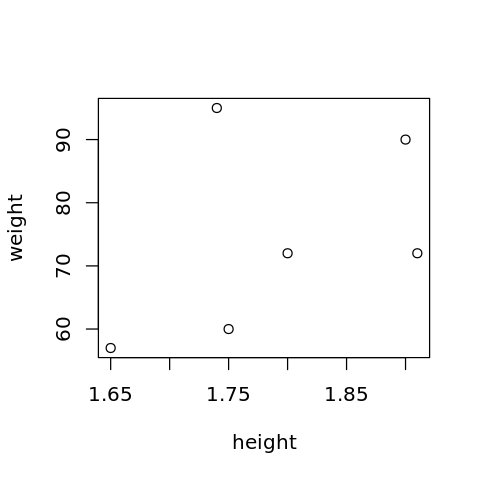

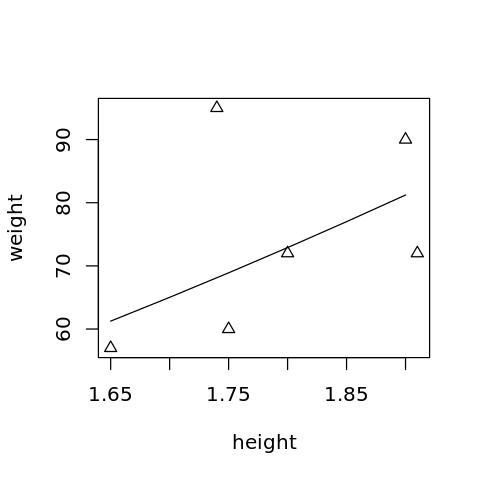

In [46]:
# Set size of the plots to be 4-by-4 inches
options(repr.plot.width=4, repr.plot.height=4)

plot(height, weight)
plot(height, weight, pch=2)
hh <- c(1.65, 1.70, 1.75, 1.80, 1.85, 1.90)
lines(hh, 22.5 * hh^2)

## 3.	R language essentials

### 3.1	Expressions and objects
The basic interaction mode in R is one of expression evaluation. The user enters an expression; the system evaluates it and prints the result. All R expressions return a value (possibly `NULL`), but sometimes it is “invisible” and not printed.

In [14]:
x<-NULL

### 3.2	Functions and arguments
Many things in R are done using function calls, commands that look like an application of a mathematical function of one or several variables; for example, $\log(x)$.

### 3.3	Vectors
We have already seen numeric vectors. There are two further types, character vectors and logical vectors. A character vector is a vector of text strings, whose elements are specified and printed in quotes:

In [15]:
c("Huey","Dewey","Louie")

[1] "Huey"  "Dewey" "Louie"

It does not matter whether you use single- or double-quote symbols, as long as the left quote is the same as the right quote:

In [16]:
c('Huey','Dewey', 'Louie')

[1] "Huey"  "Dewey" "Louie"

Logical vectors are constructed using the `c` function just like the other vector types:

In [17]:
c(T,T,F,T)

[1]  TRUE  TRUE FALSE  TRUE

**Exercise**: Try the following R script:
```
a<-c(2, 3, exp(3.2), sin(8))
a>3
```

### 3.4	Quoting and escape sequences

In [18]:
cat("Huey","Dewey","Louie", "\n")

Huey Dewey Louie 


In [19]:
cat("What is \"R\"?\n")

What is "R"?


### 3.5	Missing values
R allows vectors to contain a special `NA` value as missing values.

In [20]:
a<-NA

### 3.6	Functions that create vectors
We introduce three functions, `c`, `seq`, and `rep`, that are used to create vectors in various situations.

In [21]:
c(42,57,12,39,1,3,4)

[1] 42 57 12 39  1  3  4

In [22]:
x <- c(1, 2, 3)
y <- c(10, 20)
c(x, y, 5)

[1]  1  2  3 10 20  5

In [23]:
x <- c(red="Huey", blue="Dewey", green="Louie")
x

red    blue   green 
 "Huey" "Dewey" "Louie"

In [24]:
names(x)

[1] "red"   "blue"  "green"

In [25]:
c(pi, "abc")

[1] "3.14159265358979" "abc"

In [26]:
c(FALSE, "abc")

[1] "FALSE" "abc"

In [27]:
seq(4,9)

[1] 4 5 6 7 8 9

In [28]:
seq(4,10,2)

[1]  4  6  8 10

In [29]:
4:9

[1] 4 5 6 7 8 9

In [30]:
oops <- c(7,9,13)
rep(oops,3)

[1]  7  9 13  7  9 13  7  9 13

In [31]:
rep(oops,1:3)

[1]  7  9  9 13 13 13

### 3.7	Matrices and arrays

In [32]:
x <- 1:12
dim(x) <- c(3,4)
x

1,4,7,10
2,5,8,11
3,6,9,12


In [33]:
matrix(1:12,nrow=3,byrow=T)

1,2,3,4
5,6,7,8
9,10,11,12


In [34]:
x <- matrix(1:12,nrow=3,byrow=T)
rownames(x) <- LETTERS[1:3]
x

A,1,2,3,4
B,5,6,7,8
C,9,10,11,12


In [35]:
t(x)

A,B,C
1,5,9
2,6,10
3,7,11
4,8,12


In [36]:
cbind(A=1:4,B=5:8,C=9:12)

A,B,C
1,5,9
2,6,10
3,7,11
4,8,12


In [37]:
rbind(A=1:4,B=5:8,C=9:12)

A,1,2,3,4
B,5,6,7,8
C,9,10,11,12


### 3.8	Factors

It is common in statistical data to have categorical variables, indicating some subdivision of data. Such variables should be specified as factors in R. The terminology is that a factor has a set of levels.

In [38]:
pain <- c(0,3,2,2,1)
fpain <- factor(pain,levels=0:3)
levels(fpain) <- c("none","mild","medium","severe")
fpain			### the results

[1] none   severe medium medium mild  
Levels: none mild medium severe

In [39]:
as.numeric(fpain)
levels(fpain)

[1] 1 4 3 3 2

[1] "none"   "mild"   "medium" "severe"

### 3.9	Lists

It is sometimes useful to combine a collection of objects into a larger composite object. This can be done using lists.

In [40]:
intake.pre <- c(5260,5470,5640,6180,6390,6515,6805,7515, 7515,8230,8770)
intake.post <- c(3910,4220,3885,5160,5645,4680,5265,5975, 6790,6900,7335)
mylist <- list(before=intake.pre,after=intake.post)

mylist
mylist$before

$before
 [1] 5260 5470 5640 6180 6390 6515 6805 7515 7515 8230 8770

$after
 [1] 3910 4220 3885 5160 5645 4680 5265 5975 6790 6900 7335

[1] 5260 5470 5640 6180 6390 6515 6805 7515 7515 8230 8770

### 3.10 Data frame
A data frame corresponds to what other statistical packages call a “data matrix” or a “data set”. You can create data frames from preexisting variables:

In [41]:
d <- data.frame(intake.pre,intake.post)
d

intake.pre,intake.post
5260,3910
5470,4220
5640,3885
6180,5160
6390,5645
6515,4680
6805,5265
7515,5975
7515,6790
8230,6900


In [42]:
d$intake.pre

[1] 5260 5470 5640 6180 6390 6515 6805 7515 7515 8230 8770

### 3.11	Indexing

If you need a particular element in a vector, for instance the premenstrual energy intake for woman No. 5, you can do

In [43]:
intake.pre[5]
intake.pre[c(3,5,7)]
v <- c(3,5,7);  intake.pre[v]
intake.pre[1:5]
intake.pre[-c(3,5,7)]

[1] 6390

[1] 5640 6390 6805

[1] 5640 6390 6805

[1] 5260 5470 5640 6180 6390

[1] 5260 5470 6180 6515 7515 7515 8230 8770

### 3.12	Conditional selection

In [44]:
intake.post[intake.pre > 7000]
intake.post[intake.pre > 7000 & intake.pre <= 8000]
intake.pre > 7000 & intake.pre <= 8000

[1] 5975 6790 6900 7335

[1] 5975 6790

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE

### 3.13 Indexing of data frames

In [45]:
d <- data.frame(intake.pre,intake.post)
d[5,1]
d[5,]
d[d$intake.pre>7000,]
sel <- d$intake.pre>7000

[1] 6390

,intake.pre,intake.post
5,6390,5645


,intake.pre,intake.post
8,7515,5975
9,7515,6790
10,8230,6900
11,8770,7335
